# AI_Assignment #4
## Machine Learning
### Mohammad Javad Pesarakloo, SID = 810100103 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA
At first, lets load the dataset as a pandas dataframe:

In [2]:
df = pd.read_excel('DataSet.xlsx')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,NaN,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     480 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      479 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        486 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     452 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,480.000000,506.000000,506.000000,506.000000,479.000000,506.000000,506.000000,506.000000,486.000000,506.000000,452.000000
mean,1.269195,13.295257,9.205158,0.175000,1.101175,15.679800,58.744660,6.211663,78.063241,339.317787,42.614980,336.820947,11.537806,23.750442
std,2.399207,23.048697,7.169630,0.380364,1.646991,27.220206,33.104049,6.527286,203.542157,180.670077,87.585243,121.174519,6.064932,8.808602
min,0.000000,0.000000,0.000000,0.000000,0.385000,3.561000,1.137000,1.129600,1.000000,20.200000,2.600000,0.320000,1.730000,6.300000
25%,0.049443,0.000000,3.440000,0.000000,0.449000,5.961500,32.000000,2.425900,4.000000,254.000000,17.000000,370.415000,6.877500,18.500000
50%,0.144655,0.000000,6.960000,0.000000,0.538000,6.322500,65.250000,3.917500,5.000000,307.000000,18.900000,390.885000,10.380000,21.950000
75%,0.819623,18.100000,18.100000,0.000000,0.647000,6.949000,89.975000,6.341400,24.000000,403.000000,20.200000,395.630000,15.015000,26.600000
max,9.966540,100.000000,27.740000,1.000000,7.313000,100.000000,100.000000,24.000000,666.000000,711.000000,396.900000,396.900000,34.410000,50.000000


Now that we have an overall view of the data, lets find missing datas

In [4]:
df.isna().sum(axis=0)

CRIM        0
ZN          0
INDUS       0
CHAS       26
NOX         0
RM          0
AGE         0
DIS        27
RAD         0
TAX         0
PTRATIO     0
B          20
LSTAT       0
MEDV       54
dtype: int64

As we see, we have several missing items in our dataset.Now lets visualize unique values of each coloumn:

Text(0, 0.5, 'count')

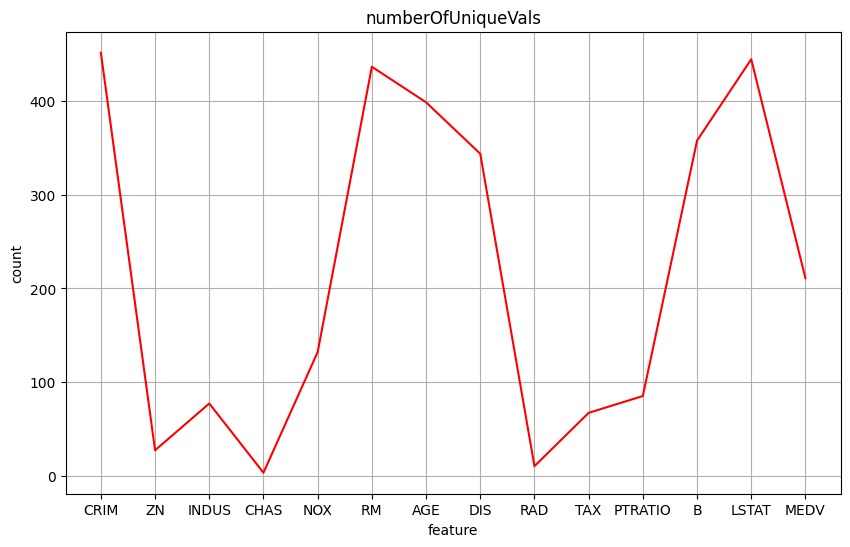

In [5]:
values = {x:np.unique(df[x].to_numpy()) for x in df.columns.tolist()}
uniqeVals = [len(values[key]) for key in values.keys()]
plt.figure(figsize=(10, 6))
plt.plot(values.keys(), uniqeVals, color='red')
plt.title("numberOfUniqueVals")
plt.grid()
plt.xlabel("feature")
plt.ylabel("count")

<Axes: >

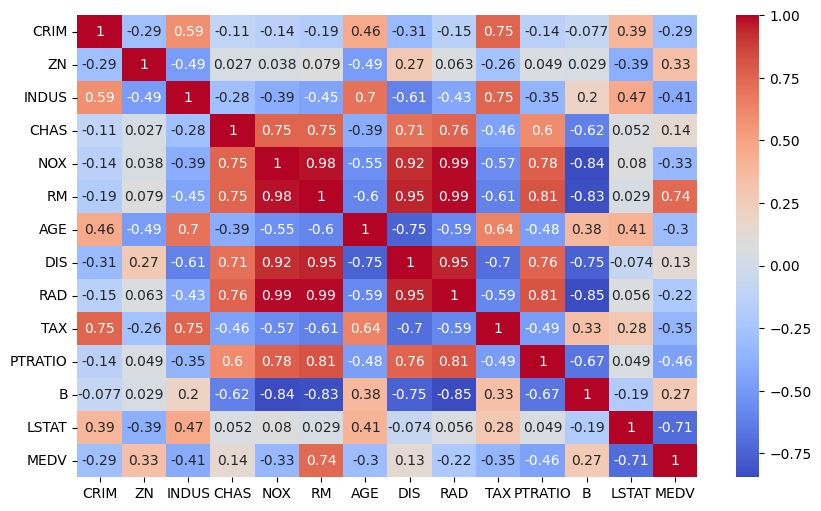

In [6]:
correlationMatrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm')

In the above heatMap, we have correlation matrix of the dataframe in which the warmer the color, the more the correlated the features are.For example we can see that the feature **RM** is mostly correlated with the target variable

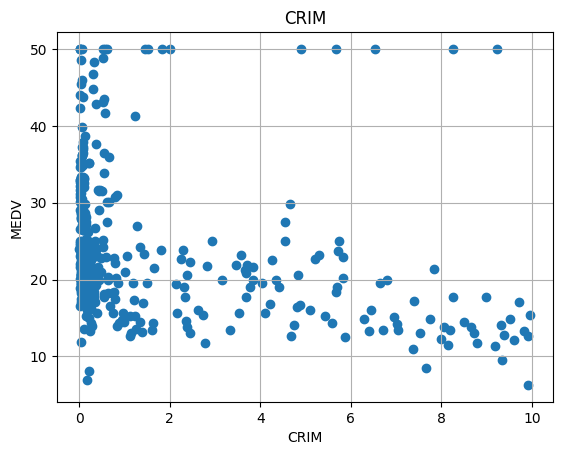

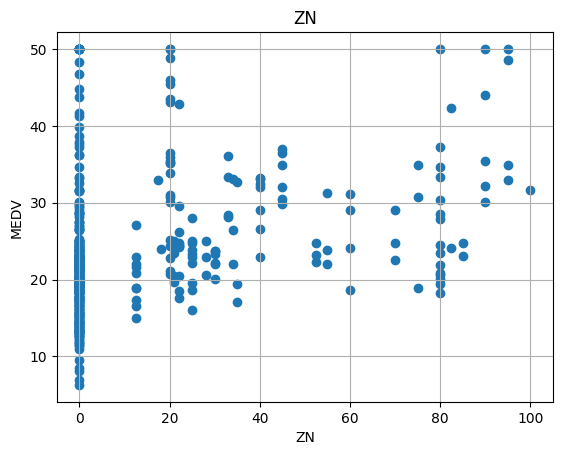

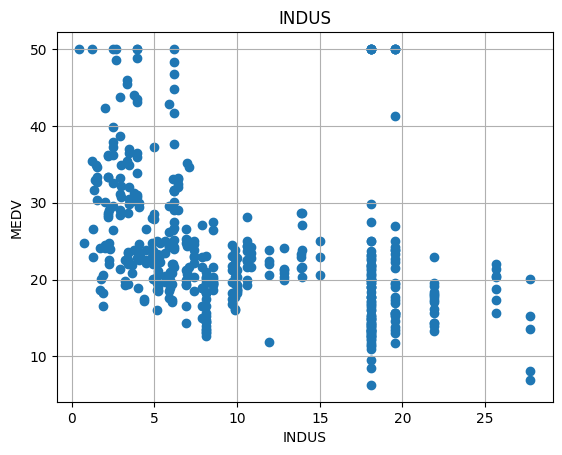

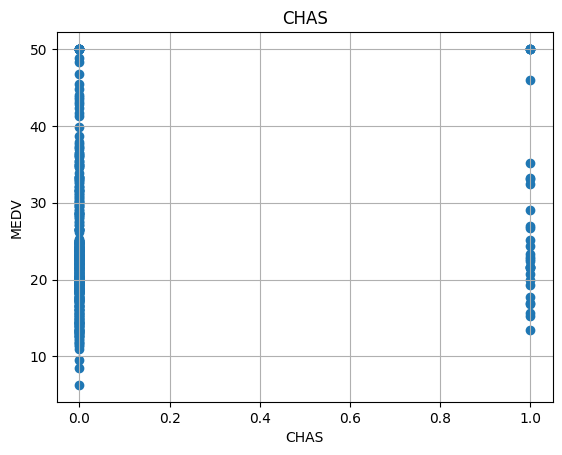

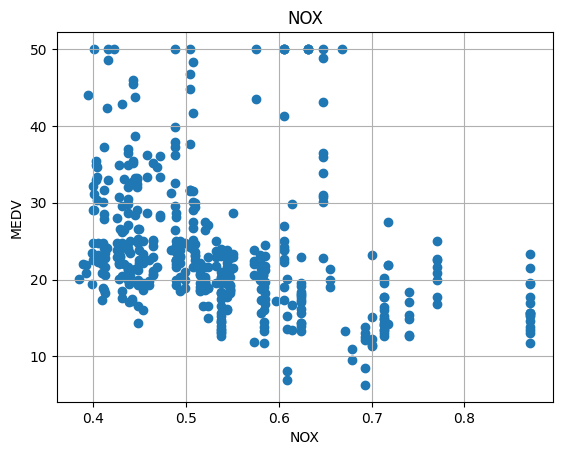

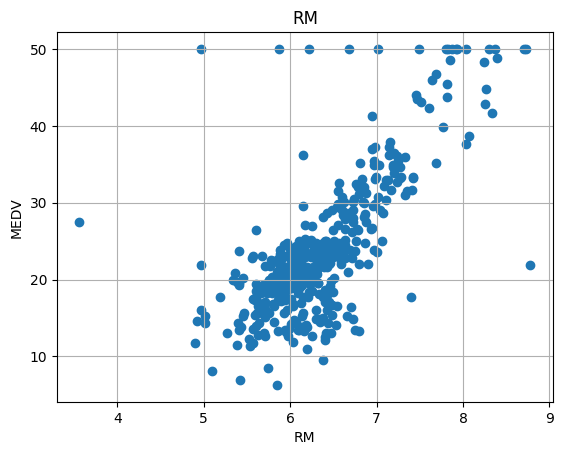

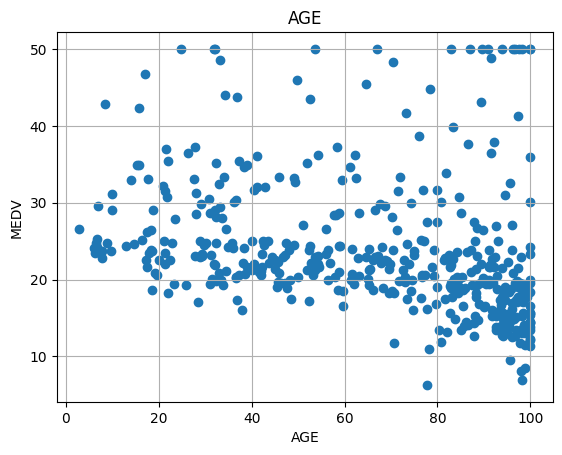

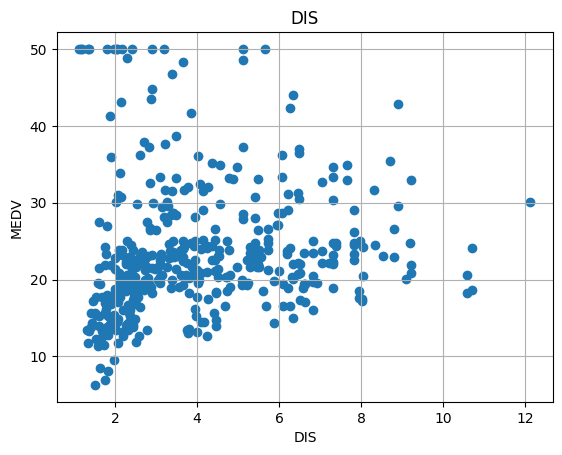

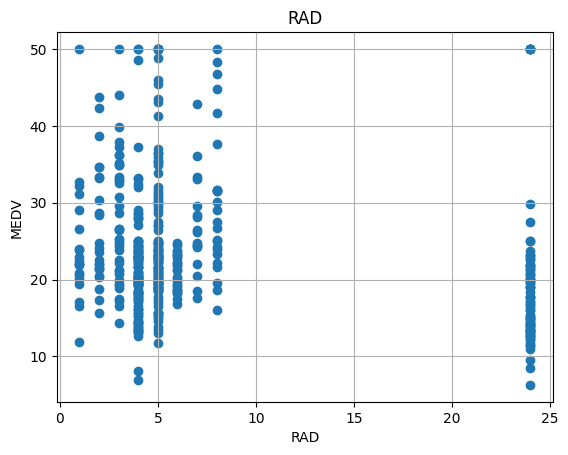

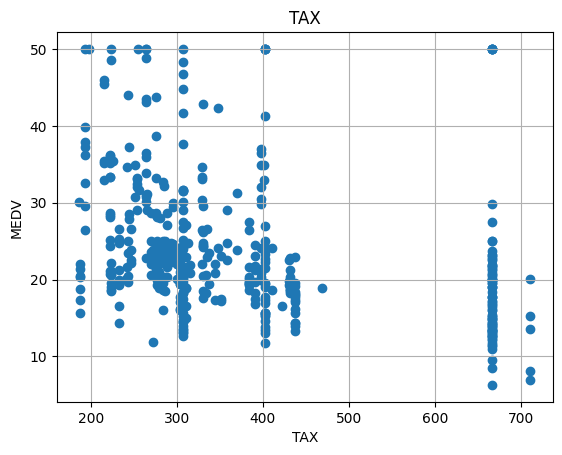

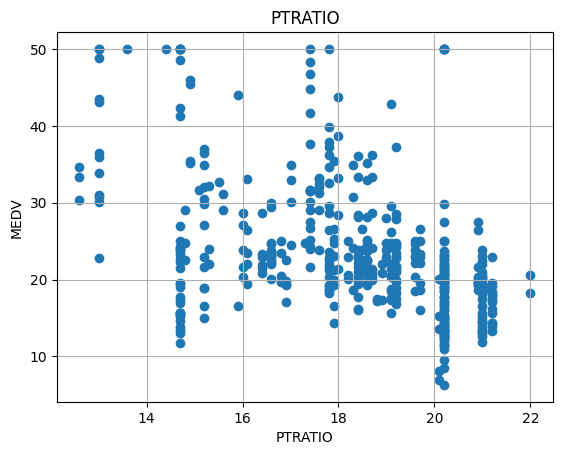

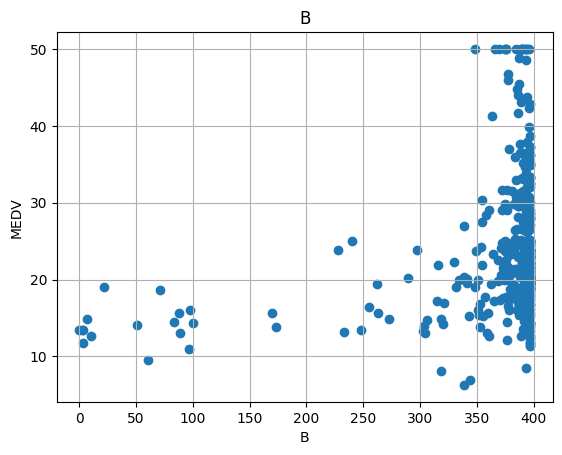

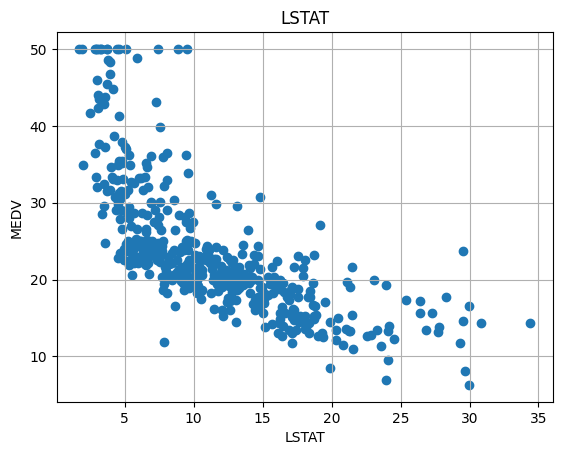

In [7]:
for feature in df.columns[0:-1]:
    plt.figure()
    plt.scatter(df[feature], df.iloc[:, -1])
    plt.title(feature)
    plt.grid()
    plt.xlabel(feature)
    plt.ylabel("MEDV")

In the above scatter plots, we can see the relation of a feature and target variable.For example feature **LSTAT** looks more like a line than other features and can be used for linear regression.A **hexbin** plot is a type of data visualization that displays the frequency of occurrences within a dataset in a two-dimensional space. It’s particularly useful for managing and representing large datasets with overlapping points where a scatter plot would be less effective due to overplotting.Lets visualize hexbin plot of the dataset.

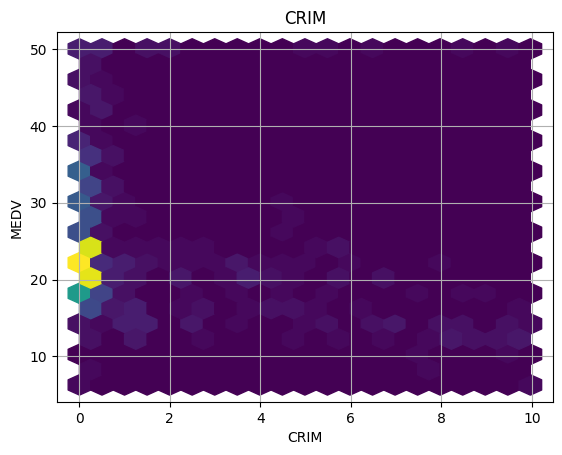

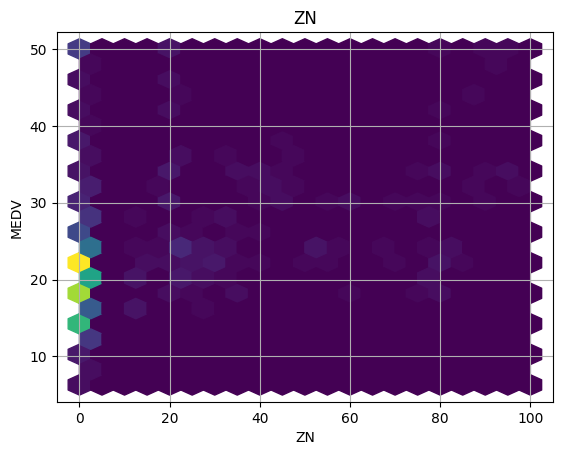

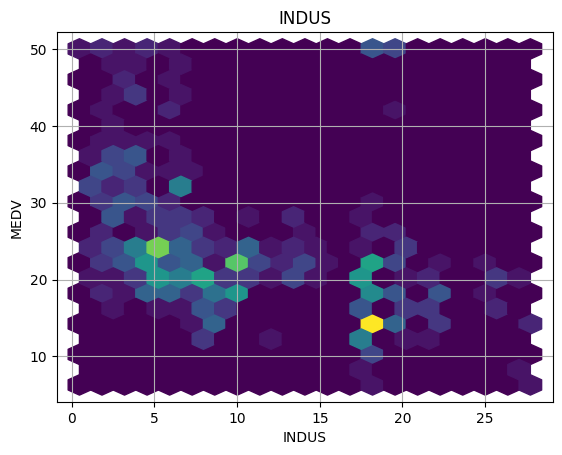

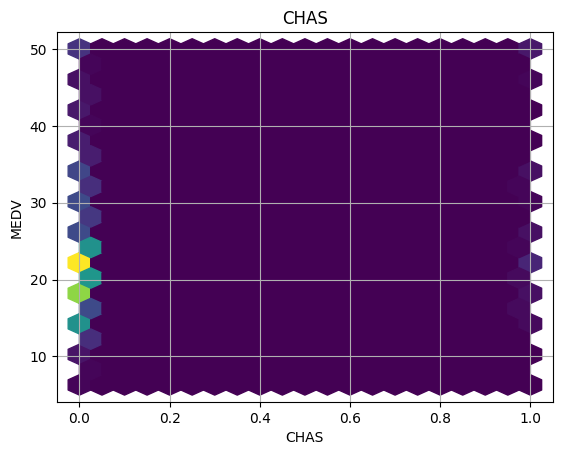

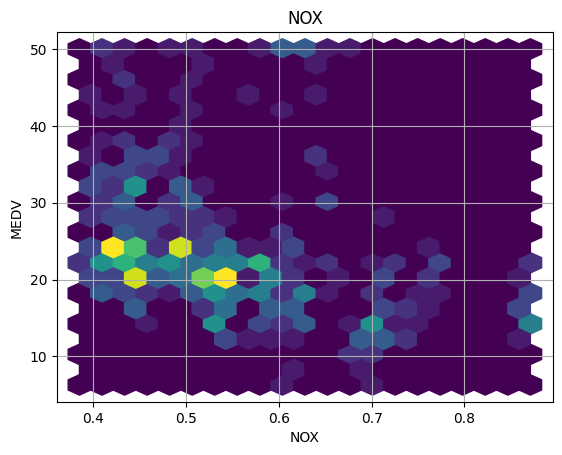

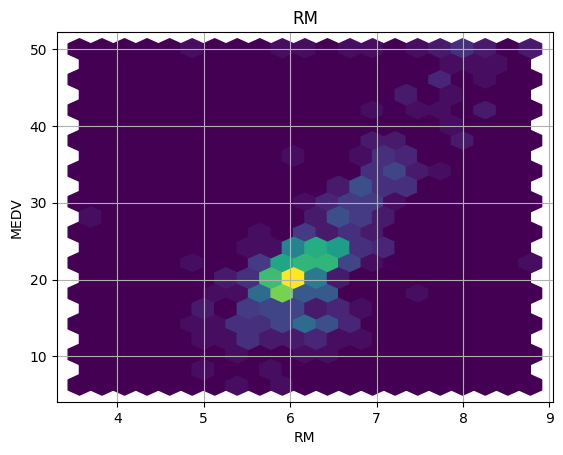

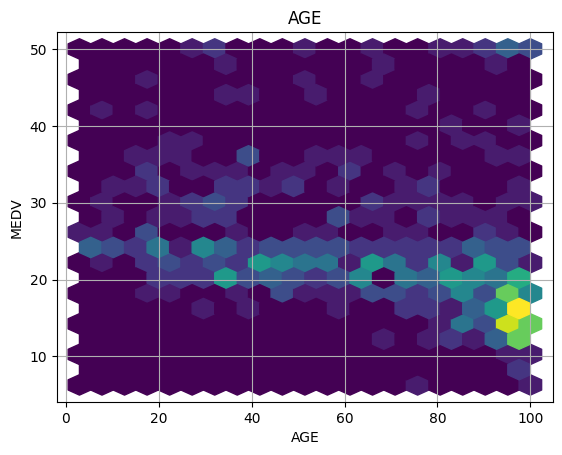

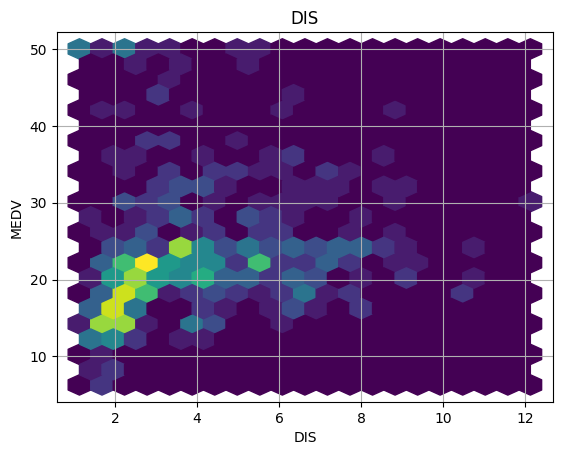

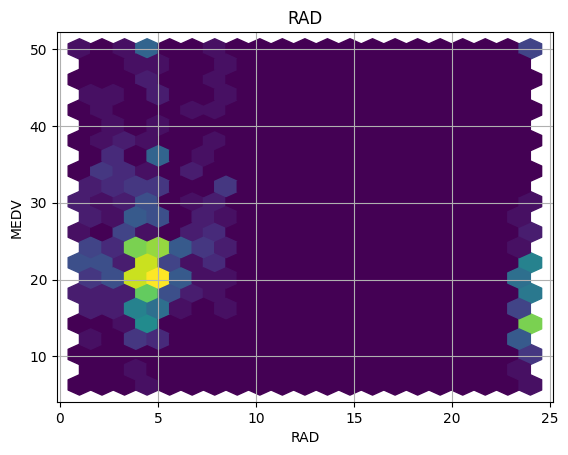

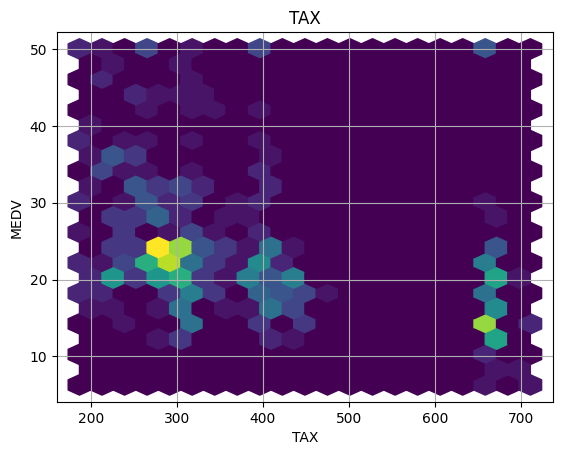

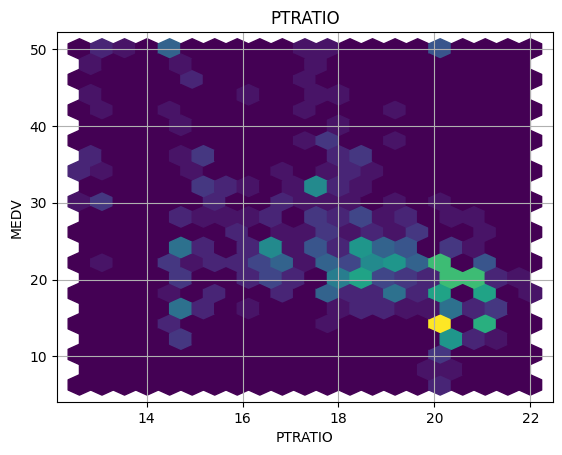

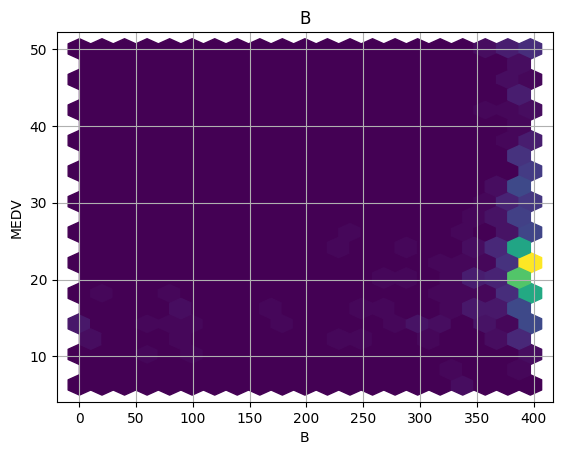

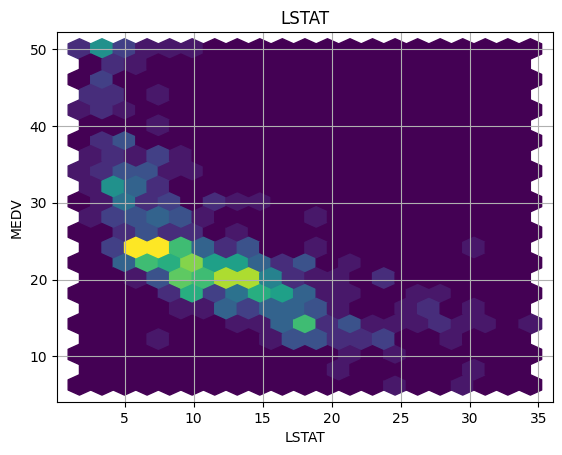

In [8]:
for feature in df.columns[0:-1]:
    plt.figure()
    plt.hexbin(df[feature], df.iloc[:, -1], gridsize=20)
    plt.title(feature)
    plt.grid()
    plt.xlabel(feature)
    plt.ylabel("MEDV")

Another metric we can use to visualize data is the **histogram** of features.plotting histogram, we can see the shape of it's pdf and see which features looks more like the target variable:

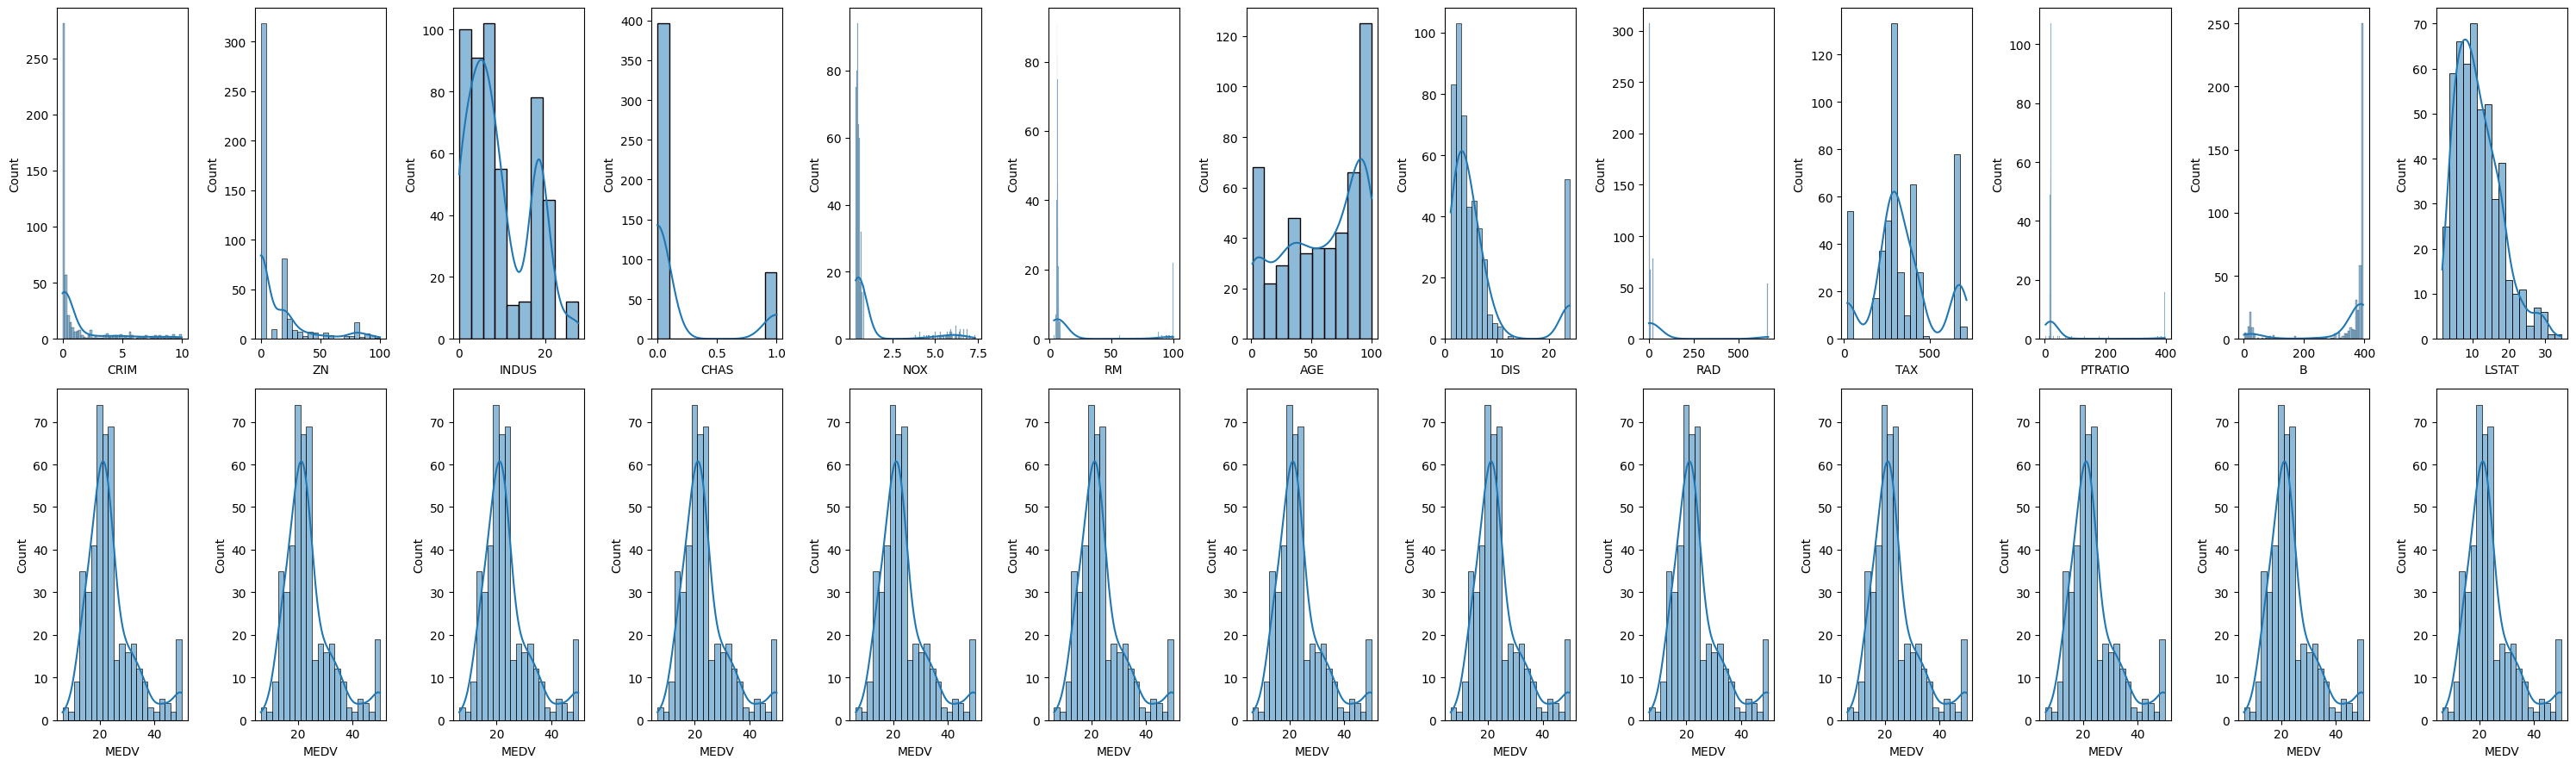

In [9]:
fig, axes = plt.subplots(2, 13, figsize=(30, 9))
for j, feature_ in enumerate(df.columns[0:-1]):
    sns.histplot(df[feature_], ax= axes[0, j], kde = True)
    sns.histplot(df.iloc[:, -1], ax= axes[1, j], kde = True)
plt.tight_layout()
plt.show()

from the above histplot, we can see that **Lstat** looks more like the target variable

# Preprocessing
One of the most important steps in a machine learning project is the preprocessing step through which we change the format of train data to make it more adaptive for our model.lets explore different phases of preprocessing.
## Handling missing values
In each dataset, some items might be unvailable.There are different methods that can be used in different cases;The method we use totally depends on the format of the dataset.For example when number of missing values is very low, we can easily ommit that row of data;but when it is high, which is usually the case, we should apply some other methods.Here are three methods of handling missing values:
### 1-Removing the sample
Suppose we have a sample with 10 features, 7 of which are not available, we can remove this samples because most of its features are not available.

In [10]:
max(df.isna().sum(axis=1))

2

As we see, in our dataset in each row, we have at most two missing values;thus it is not wise to romove any sample and we should use other methods.
### 2-Replacing the missing item with mean
Suppose the feature X is not available in some rows, we can easily replace this item with the mean value of availbe Xs:

In [11]:
df.fillna(df.mean(), inplace=True)

In [12]:
df.isna().sum().sum()

0

### 3-Replacing with median
This method is exactly the same as the above method but instead of mean, we are using median

Features in each dataset can be either **numerical** or **categorical**.The difference is that numercial features can have any continous values while categorial features are discrete.From the scatter plot, we can see that the feature **CHAS** is categorical while others are numerical.

## Standardizing and Normalizing
Normalizing and standardizing are two common techniques used in preprocessing data in machine learning to improve the performance of machine learning models.
### 1-Normalizing
Normalizing is the process of scaling the numerical features of a dataset to a standard range, typically between 0 and 1. This is done by subtracting the minimum value of the feature and dividing by the range (maximum value - minimum value). Normalizing ensures that all features have the same scale, which can help the model converge faster and avoid bias towards features with larger scales.
$$
    n = \frac{x - l}{m - l}
$$
### 2-Standardizing
Standardizing is the process of transforming the numerical features of a dataset to have a mean of 0 and a standard deviation of 1. This is done by subtracting the mean of the feature and dividing by the standard deviation. Standardizing ensures that the features have a similar distribution, which can help improve the performance of models that are sensitive to the scale of the features, such as linear models and neural networks.
$$
    n = \mathcal{N}(\frac{x - \mu}{\sigma^2})
$$

These methods are definitely required in this project because if not applied, our model will be biased to features which have greater scale than others despite having any priority to them.


We should note that not always our datas are numerical, sometimes we might have **String** or **objects**.There are several preprocessings that should be done on this kind of data:
* Label encoding or one-hot encoding: Convert categorical string data into numerical format using label encoding or one-hot encoding.
* Text processing: Convert textual data into numerical format using techniques such as tokenization, stemming, and lemmatization.
* Handling outliers: Identify and handle outliers in the string or object data.
* Feature scaling: Scale the string or object data to bring all the features to a similar scale.

before we train our model, we need to divide them into three categories:
* **Train Data** : This is the data which we fit our model to it
* **Validation Data** : Every model has some hyperparameters.For example in KNN classifier, the value of K is a parameter that should be adjusted.Using the validation data, we find the optimal hyperparameters that minimize the summation of **bias** and **variance** error
* **Test Data** : After finding the optimal hyperparamters and training the model, we can evaluate our model using the test data which is not seen by the model previously.


There are several other methods of preprocessing like omitting noise, dimensionality reduction, etc.

# Regression
In this project, we are training supervised models.The difference between supervised learning and unsupervised learning is that in supervised learning, we know the exact label of the train data.But in unsupervised learning our main goal is to find patterns and similarities in our data.
One of the most applicable and general frameworks of supervised learning is **Regression**.In regression unlike classification, the output of the model can be any continous number.Given some datavectors and their target value, we learn some weights from the data to predict any query in our feature space.First lets explore linear regression.
## Linear Regression
In linear regression, our aim is to fit a line to the feature space.To do so, we first need to define a loss function for our model and then try to minimize that.One of the most popular loss functions in linear regression is sum of squared errors which we try to minimize in the following equations:

Main form of simple linear regression function:
$$f(x) = \alpha x + \beta$$

here we want to find the bias ($\alpha$) and slope($\beta$) by minimizing the derivation of the Residual Sum of Squares (RSS) function:

- step 1: Compute RSS of the training data  

$$ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} * x_i) )^2 $$

- step 2: Compute the derivatives of the RSS function in terms of $\alpha$ and $\beta$, and set them equal to 0 to find the desired parameters

$$ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} * x_i) = 0$$
$$ \to \beta = \hat{y} - \hat{\alpha} \hat{x} \to (1)$$


$$ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i ^ 2) = 0 \to (2)$$

$$ (1) , (2) \to \hat{\alpha} = \frac{\Sigma{(x_i - \hat{x})(y_i - \hat{y})}}{\Sigma{(x_i - \hat{x})^2}}
$$
$$ \hat{\beta} = y - \hat{a} x$$



Based on the above formula, implement the function below to compute the parameters of a simple linear regression

In [13]:
def linear_regression(input, output):
  alpha = (np.sum((input - np.mean(input))*(output - np.mean(output)))) / (np.sum(np.power(input - np.mean(input), 2)))
  beta = np.mean(output) - alpha*np.mean(input)
  return [alpha, beta]

Now complete this `get_regression_predictions(...)` function to predict the value of given data based on the calculated intercept and slope

In [14]:
def get_regression_predictions(input, intercept, slope):
    return input*slope + intercept

Now that we have a model and can make predictions, let's evaluate our model using Root Mean Square Error (RMSE). RMSE is the square root of the mean of the squared differences between the residuals, and the residuals is just a fancy word for the difference between the predicted output and the true output.

Complete the following function to compute the RSME of a simple linear regression model given the input_feature, output, intercept and slope:

In [15]:
def get_root_mean_square_error(predicted_values, actual_values):
  return np.sqrt((1/(len(actual_values))) * np.sum(np.power(predicted_values - actual_values, 2)))

The RMSE has no bound, thus it becomes challenging to determine whether a particular RMSE value is considered good or bad without any reference point. Instead, we use R2 score. The R2 score is calculated by comparing the sum of the squared differences between the actual and predicted values of the dependent variable to the total sum of squared differences between the actual and mean values of the dependent variable. The R2 score is formulated as below:

$$R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$

Complete the following function to calculate the R2 score of a given input_feature, output, bias, and slope:

In [16]:
def get_r2_score(predicted_values, actual_values):
  mean_yMain = sum(actual_values) / len(actual_values)
    
  tss = sum((y - mean_yMain) ** 2 for y in actual_values)
    
  rss = sum((actual_values[i] - predicted_values[i]) ** 2 for i in range(len(actual_values)))
  
  r2 = 1 - (rss / tss)
  
  return r2


Now calculate the fitness of the model.
Remember to provide explanation for the outputs in your code!

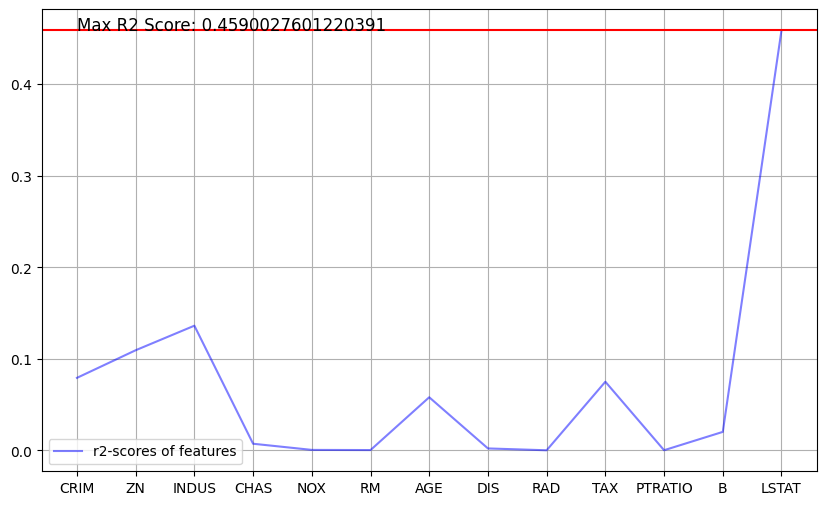

In [17]:
designated_feature_list = df.columns.to_list()[:-1]
r2_scores = []
for feature in designated_feature_list:
  alpha, beta = linear_regression(df[feature].to_numpy(), df['MEDV'])
  r2_scores.append(get_r2_score(get_regression_predictions(df[feature].to_numpy(), beta, alpha), df['MEDV']))

plt.figure(figsize=(10, 6))
plt.plot(designated_feature_list, r2_scores, alpha = 0.5, label="r2-scores of features", color='blue')
plt.legend()
plt.grid()
plt.axhline(y = max(r2_scores), color = 'red')
plt.text(0, max(r2_scores), f'Max R2 Score: {max(r2_scores)}', color='black', fontsize=12)
plt.show()

From the above figure, we can see that the feature **LSTAT** gets highest score as predicted before because its scatter plot looks more like a line that other features.Lets see how the line is fit to the scatter plot

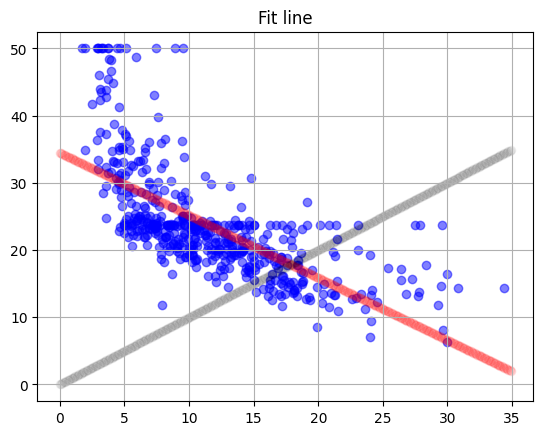

In [18]:
x = np.arange(0, 35, 0.1)
alpha , beta = linear_regression(df['LSTAT'].to_numpy(), df['MEDV'].to_numpy())
y = alpha*x + beta
plt.figure() 
plt.scatter(df['LSTAT'], df['MEDV'], alpha=0.5, color='blue')
plt.scatter(x, y, alpha=0.1, color='red')
plt.scatter(x, x, alpha=0.05, color = 'black')
plt.title("Fit line")
plt.grid()
plt.show()

# Ploynomial Regression

To extend the simple linear regression to polynomial regression, we can model the relationship between the independent variable $x$ and the dependent variable $y$ as a polynomial function of degree $n$:

$$f(x) = \beta_0 + \beta_1x + \beta_2x^2 + \ldots + \beta_nx^n$$

The steps to find the parameters $\beta_i$ are similar to those in simple linear regression. We again minimize the RSS function by taking the derivatives with respect to each parameter and setting them to 0.

- Step 1: Compute the RSS function for polynomial regression:

$$ RSS = \Sigma (y_i - (\hat{\beta_0} + \hat{\beta_1}x_i + \hat{\beta_2}x_i^2 + \ldots + \hat{\beta_n}x_i^n))^2 $$

- Step 2: Compute the derivatives of the RSS function with respect to each parameter $\beta_i$ and set them to 0 to find the desired parameters.

$$ \frac{\partial RSS}{\partial \beta_i} = 0, \text{ for } i = 0, 1, 2, \ldots, n$$

Solving these equations will give us the optimal values of $\beta_i$ for the polynomial regression model. The specific form of the equations will depend on the degree of the polynomial and the number of parameters.

The general form for finding the coefficients for polynomial regression can be represented as:

$$ \beta = (X^T X)^{-1} X^T y $$

where:
- $X$ is the design matrix with columns $x^0, x^1, x^2, ..., x^n$
- $x^i$ represents the feature vector of $x$ raised to the power of $i$
- $y$ is the target variable vector
- $\beta$ is the coefficient vector for the polynomial regression

By solving for $\beta$ using the above formula, we can obtain the coefficients for the polynomial regression model.

In [ ]:
def polynomial_regression(x, y, degree):
  X = np.array([np.power(x, i) for i in range(degree+1)])
  return np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), y)

## Computing the Derivative

As we saw, the cost function is the sum over the data points of the squared difference between an observed output and a predicted output.

Since the derivative of a sum is the sum of the derivatives, we can compute the derivative for a single data point and then sum over data points. We can write the squared difference between the observed output and predicted output for a single point as follows:

$$
(output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))^2
$$

With n feautures and a const , So the derivative will be :


$$
2 * (output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))
$$

The term inside the paranethesis is just the error (difference between prediction and output). So we can re-write this as:

$$2 * error*[feature_i] $$


That is, the derivative for the weight for feature i is the sum (over data points) of 2 times the product of the error and the feature itself. In the case of the constant then this is just twice the sum of the errors!

Recall that twice the sum of the product of two vectors is just twice the dot product of the two vectors. Therefore the derivative for the weight for feature_i is just two times the dot product between the values of feature_i and the current errors.


With this in mind, complete the following derivative function which computes the derivative of the weight given the value of the feature (over all data points) and the errors (over all data points).


In [ ]:
def feature_derivative(errors, feature):
  #TO DO
  pass

## Gradient Descent

Now we will write a function that performs a gradient descent. The basic premise is simple. Given a starting point we update the current weights by moving in the negative gradient direction. Recall that the gradient is the direction of increase and therefore the negative gradient is the direction of decrease and we're trying to minimize a cost function.


The amount by which we move in the negative gradient direction is called the 'step size'. We stop when we are 'sufficiently close' to the optimum. We define this by requiring that the magnitude (length) of the gradient vector to be smaller than a fixed 'tolerance'.


With this in mind, complete the following gradient descent function below using your derivative function above. For each step in the gradient descent we update the weight for each feature befofe computing our stopping criteria.

In [ ]:
# Utility functions for multiple regression

def normalize_features(chosen_features, data_frame):
    for feature in chosen_features:
        data_frame[feature] = (data_frame[feature] - data_frame[feature].mean()) / data_frame[feature].std()
    return data_frame

def predict_output(feature_matrix, weights, bias):
    #TO DO FOR POLYNOMIAL REGRESSION PREDICTION
    return predictions



## Polynomial Regression Using Gradient Descent

Polynomial regression using gradient descent involves finding the optimal parameters for a polynomial model by iteratively updating them based on the gradient of a loss function, typically the Mean Squared Error (MSE). The steps involved are as follows:

- **Step 1: Define the polynomial model**
The polynomial model has the form:
$$f(x) = \beta_0 + \beta_1x + \beta_2x^2 + \ldots + \beta_nx^n$$

- **Step 2: Define the loss function**
The loss function, such as Mean Squared Error (MSE), measures the error between the actual target values and the predicted values by the model.

- **Step 3: Initialize the coefficients**
Start with initial guesses for the coefficients $\beta_0, \beta_1, \ldots, \beta_n$

- **Step 4: Update the coefficients using Gradient Descent**
Iteratively update the coefficients to minimize the loss function. This is done by computing the gradient of the loss function with respect to each coefficient and making small adjustments in the opposite direction of the gradient.

- **Step 5: Repeat until convergence**
Continue updating the coefficients iteratively until the algorithm converges to the optimal values.

- **Step 6: Use the learned coefficients for prediction**
Once the coefficients converge, they can be used in the polynomial function to make predictions on new data points.

Overall, polynomial regression using gradient descent is an iterative optimization process that aims to find the best-fitting polynomial curve to the data points by minimizing the prediction errors. The learning rate and the number of iterations are key hyperparameters to tune for efficient convergence and accurate modeling.



In [ ]:
def polynomial_regression_gradient_descent(feature_matrix, outputs, initial_weights,bias, step_size, tolerance):
    weights = np.array(initial_weights)

    while True:
        # Compute predictions using polynomial function and errors
        #TO DO

        # Compute derivatives for all weights
        #TO DO

        # Update weights and bias
        #TO DO

        # Check convergence
        #TO DO

    return weights, bias

In [ ]:

def run_polynomial_regression(chosen_feature_matrix, target_matrix, keywords):
    initial_weights = keywords['initial_weights']
    step_size = keywords['step_size']
    tolerance = keywords['tolerance']
    bias = keywords['bias']
    weights = np.array(initial_weights)
    weights, bias = polynomial_regression_gradient_descent(chosen_feature_matrix, target_matrix, weights, bias, step_size, tolerance)

    return weights, bias

def get_weights_and_bias(chosen_features):

    keywords = {
        'initial_weights': np.array([.5]*len(chosen_features)),
        'step_size': 1.e-4,
        'tolerance': 1.e-10,
        'bias': 0
    }

    # TO DO

    return chosen_feature_matrix, train_weights, bias

# Classification
In classification, our task is to determine the label of given query.One of the most popular classification models is **Decision Tree**.One of the bugs of decision trees is that the can easily overfitt to train data.To prevent this, we can prune the decision tree.Pruning in decision trees refers to the process of reducing the size of the tree by removing certain branches that do not provide significant value or improve the overall accuracy of the model.Lets explore some of its pros and cons:
> pros
>> * Prevents overfitting: Pruning helps to simplify the model and improve its generalization by removing unnecessary branches that may capture noise in the data.
>> * Improves interpretability: A pruned decision tree is easier to interpret and understand, making it more useful for decision-making and analysis.
>> * Reduces computational complexity: Smaller trees resulting from pruning are faster to build and require less computational resources for prediction.

> cons
>> * Risk of underfitting: Pruning too aggressively may lead to a simplified model that fails to capture important patterns in the data, resulting in underfitting.
>> * Loss of information: Removing branches from the tree may result in the loss of valuable information that could potentially improve the model's accuracy.
>> * Selection of optimal pruning parameters: Determining the optimal pruning parameters, such as the depth of the tree or the minimum number of samples required to split a node, can be a challenging task and may require experimentation.

Under the following circumstances, decision trees can be prior to other models:
* Interpretability: Decision trees are easy to interpret and visualize, making them a preferred choice when the model needs to be easily understood by non-technical stakeholders or when the decision-making process needs to be transparent.
* Non-linear relationships: Decision trees are capable of capturing non-linear relationships between features, making them suitable for datasets with complex interactions and patterns.
* Handling both numerical and categorical data: Decision trees can handle both numerical and categorical data without the need for data preprocessing such as one-hot encoding, making them versatile and easy to work with.
* Scalability: Decision trees are relatively fast to build and can handle large datasets with high dimensionality, making them suitable for applications where computational efficiency is important.
* Feature importance: Decision trees provide a measure of feature importance, which can be useful for feature selection and understanding the impact of different variables on the target variable.

> Question : What is the primary difference between models like KNN and methods like Neural Networks and Logistic Regression?
>> Answer : Models like Logistic Regression are categorized as **Generative** models which learn decistion boundaries from train data and don't have to do anything with the train data anymore.But models like KNN are categorized as **Discriminative** models that do not learn decision boundaries and to answer each query, they refer to all training data.

Now lets explore **One Nearest Neighbor** algorithm.One nearest neighbor algorithm, also known as the 1-NN algorithm, is a simple instance-based learning algorithm used for classification and regression tasks. In this algorithm, the predicted value for a new data point is determined by the value of the nearest neighbor in the training dataset.

> Pros
>> * Simple and easy to implement: The 1-NN algorithm is straightforward to understand and implement, making it a good choice for beginners in machine learning.
>> * Non-parametric: The algorithm does not make any assumptions about the underlying data distribution, making it flexible and able to handle complex patterns in the data.
>> * Adaptability to new data: The algorithm can easily adapt to new data points without the need to retrain the model, as predictions are based on the nearest neighbor in the training dataset.

> Cons
>> * Computationally expensive: Calculating distances between the new data point and all points in the training dataset can be computationally expensive, especially for large datasets.
>> * Sensitivity to noise and outliers: The algorithm is sensitive to noise and outliers in the data, as the prediction is based on the nearest neighbor, which may not always be representative of the true underlying pattern.
>> * Lack of generalization: The 1-NN algorithm may not generalize well to unseen data, as it relies heavily on the training dataset and may not capture the overall trends in the data.

As mentioned above, one of the challenges in KNN algorithm is calculating the distance of points which is computationally expensive.To reduce this overhead, there are several methods.Lets explore some of them:

### 1-Partial distances
Compute distance using first r dimensions only:
$$
    D_{r}(x, x\prime) = (\sum_{k=1}^{r}(x_{k} - x\prime_{k})^{2})^{1/2}
$$
where r < d
### 2-Pre-structuring: Bucketing
In the Bucketing algorithm,the space is divided into identical cells.For each cell the data points inside it are stored in a list.Given a test point x, find the cell that contains it.Search only the points inside that cell. It does not guarantee to find the true nearest neighbor(s) and it is a speed vs accuracy tradeoff.

![Image Title](1.png)

### 3-Pre-structuring: Search Trees(K-d trees)
A k-d tree is a data structure for storing a finite set of points from a kdimensional space.It decompose space into a relatively small number of cells such that no cell contains too many points.

![Image Title](2.png)


Now we want to do a classification on our dataset.First of all, lets add a new target column to the dataframe as requested.The label of luxurious, economical and houses with lower MEDV are 1, 2, 3 respectively

In [19]:
deciles = df['MEDV'].quantile([0.2, 0.8])
df['Class'] = 2
df.loc[df['MEDV'] <= deciles.iloc[0], 'Class'] = 1
df.loc[df['MEDV'] >= deciles.iloc[1], 'Class'] = 3
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Class
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.900000,4.98,24.0,2
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.900000,9.14,21.6,2
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.830000,4.03,34.7,3
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,336.820947,2.94,33.4,3
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.900000,5.33,36.2,3


In [20]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-2].to_numpy()
Y = df.iloc[:, -1].to_numpy()
X_train, X_test, Y_trian, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Now we want to do classification using two different model:
### KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
models = np.empty((11, ), dtype=object)
for i in range(1, 12):
    models[i-1] = KNeighborsClassifier(n_neighbors=i)
    models[i-1].fit(X_train, Y_trian)

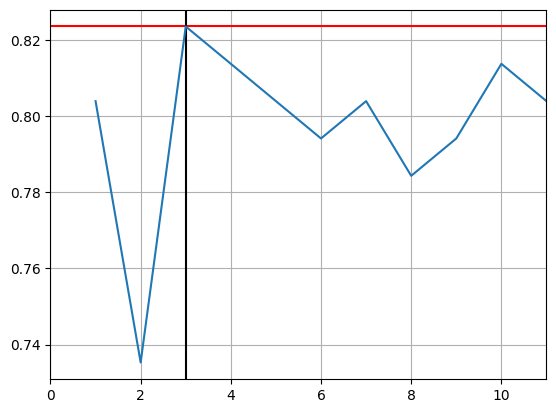

In [22]:
from sklearn.metrics import accuracy_score
accuracyOfModels = []
for model in models:
    numberOfTrueClassified = 0
    predictions = model.predict(X_test)
    accuracyOfModels.append(accuracy_score(Y_test, predictions))

plt.axhline(y=max(accuracyOfModels), color = 'red')
plt.axvline(x = np.argmax(accuracyOfModels) + 1, color = 'black')
plt.plot(np.arange(11) + 1, accuracyOfModels)
plt.xlim(0, 11)
plt.grid()
plt.show()

We see that optimal k is 3 in this case and for more values of k, overfitting occurs.Now lets find the optimal K using library

In [23]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(1, 12))}
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, Y_trian)
best_k = grid_search.best_params_['n_neighbors']
optimalModel = KNeighborsClassifier(n_neighbors=best_k)
optimalModel.fit(X_train, Y_trian)
predictions = optimalModel.predict(X_test)
print("Accuracy : ", accuracy_score(Y_test, predictions), " Best k = ", best_k)

Accuracy :  0.803921568627451  Best k =  1


### Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
models = np.empty((14, ), dtype=object)
for i in range(1, 15):
    models[i-1] = DecisionTreeClassifier(max_depth=i, criterion='log_loss')
    models[i-1].fit(X_train, Y_trian)

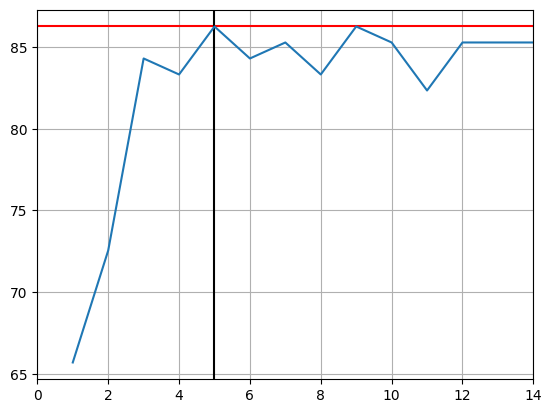

In [25]:
accuracyOfModels = []
for model in models:
    numberOfTrueClassified = 0
    predictions = model.predict(X_test)
    for x, i in enumerate(predictions):
        if i == Y_test[x]:
            numberOfTrueClassified += 1
    accuracyOfModels.append(100*(numberOfTrueClassified / len(Y_test)))

plt.axhline(y=max(accuracyOfModels), color = 'red')
plt.axvline(x = np.argmax(accuracyOfModels) + 1, color = 'black')
plt.plot(np.arange(14) + 1, accuracyOfModels)
plt.xlim(0, 14)
plt.grid()
plt.show()

And as we see in the above figure, the best depth which prevents overfitting of the decision tree is 5 in which we get about 87% accuracy.Now lets find optimal depth using GridSearchCV

In [26]:
tree = DecisionTreeClassifier(criterion='log_loss')
param_grid = {'max_depth': list(range(1, 15))}
grid_search = GridSearchCV(tree, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, Y_trian)
best_depth = grid_search.best_params_['max_depth']
optimalModel = DecisionTreeClassifier(max_depth=best_depth, criterion='log_loss')
optimalModel.fit(X_train, Y_trian)
predictions = optimalModel.predict(X_test)
print("Accuracy : ", accuracy_score(Y_test, predictions), " Best depth = ", best_depth)

Accuracy :  0.8627450980392157  Best depth =  5


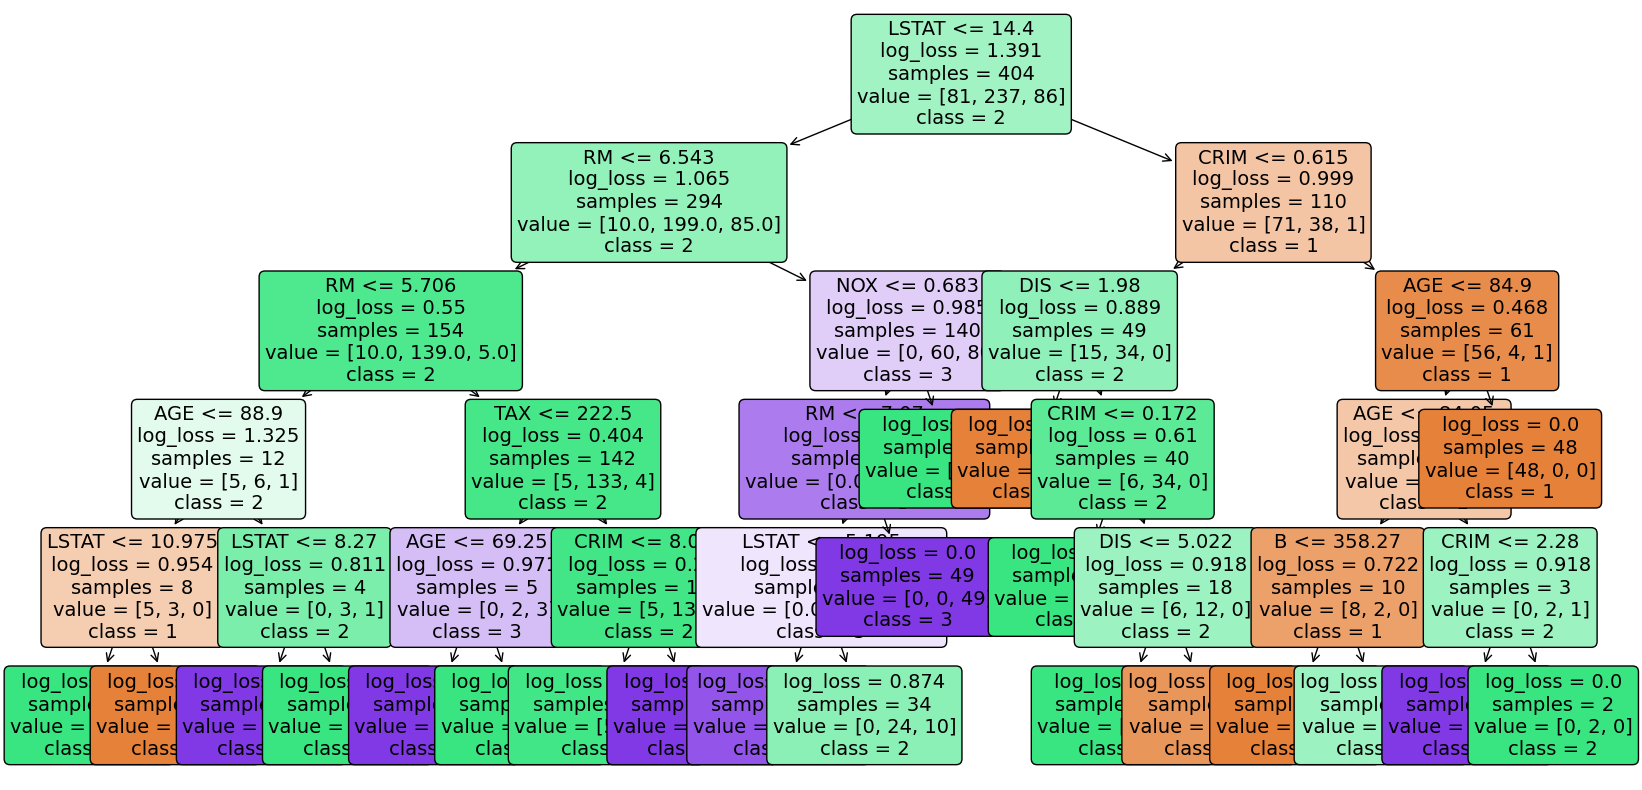

In [27]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
a = plot_tree(optimalModel, 
              feature_names=df.columns.to_list()[0:14], 
              class_names=['1', '2', '3'], 
              filled=True, 
              rounded=True, 
              fontsize=14)
plt.show()

# Ensemble Methods
Ensemble learning is a machine learning technique that combines multiple individual models to produce a more accurate and robust prediction. The idea behind ensemble learning is that by combining the predictions of multiple models, the overall prediction will be more accurate and reliable than any single model.Ensemble learning is important because it can help improve the performance of machine learning models by reducing overfitting, increasing accuracy, and improving generalization. By combining the predictions of multiple models, ensemble learning can help capture different aspects of the data and produce more robust and reliable predictions. Additionally, ensemble learning can help improve the performance of individual models that may be weak on their own.Lets explore some methods of ensemble learning
### Bagging(BootStrap + Aggregation)
In bagging, multiple models are trained on different subsets of the training data, which are sampled with replacement (bootstrap samples).Each model is trained independently of the others, and the final prediction is made by aggregating the predictions of all the models.Bagging helps reduce variance and overfitting by averaging out the predictions of multiple models trained on different subsets of the data.The most well-known algorithm that uses bagging is Random Forest, which builds multiple decision trees on different subsets of the data and averages their predictions.

### Boosting
In boosting, multiple models are trained sequentially, with each new model focusing on the errors made by the previous models.The training process involves assigning weights to the training instances, with higher weights given to instances that were misclassified by the previous models.Boosting aims to improve the performance of weak learners by combining them into a strong learner that performs well on the entire dataset.The most popular boosting algorithms include AdaBoost, Gradient Boosting, and XGBoost.

### Random Forest
Random Forest is a popular ensemble learning algorithm that combines the power of multiple decision trees to improve the accuracy and robustness of predictions. Random Forest is based on the bagging technique, where multiple decision trees are trained on different subsets of the training data and their predictions are combined to make the final prediction.Lets explore some key features of random forests:

* Decision Trees: Random Forest is built on the foundation of decision trees, which are simple yet powerful models that make predictions by splitting the data into branches based on feature values.
* Random Feature Selection: In Random Forest, each decision tree is trained on a random subset of features rather than the entire feature set. This helps to introduce diversity among the trees and reduce the correlation between them.
* Bootstrap Sampling: Random Forest uses bootstrap sampling to create multiple subsets of the training data. Each decision tree is trained on a different subset, allowing for different perspectives on the data.
* Aggregation: The predictions of all the individual decision trees in the Random Forest are aggregated to make the final prediction. For classification tasks, the final prediction is typically made through a majority voting mechanism, while for regression tasks, the predictions are averaged.

The number of decision trees in a Random Forest is indeed a critical parameter that can significantly impact the performance of the model. Having too few trees may lead to underfitting, where the model may not capture the complexity of the data adequately. On the other hand, having too many trees may lead to overfitting, where the model learns the noise in the training data and performs poorly on unseen data.The ideal number of decision trees in a Random Forest depends on the dataset and the specific problem at hand. In practice, there is no fixed optimal number of trees that works for all scenarios, and it is often determined through hyperparameter tuning using techniques like cross-validation.

Under the following circumstances, it might be wise to use random forests:

* 1- High-Dimensional Data: Random Forest can handle datasets with a large number of features (high dimensionality) without the need for feature selection or dimensionality reduction techniques.
* 2- Nonlinear Relationships: Random Forest is capable of capturing complex nonlinear relationships between features and the target variable, making it suitable for datasets with intricate patterns.
* 3- Robustness to Overfitting: Random Forest is less prone to overfitting compared to individual decision trees, thanks to the ensemble approach that combines multiple trees and averages their predictions.
* 4- Outlier and Noisy Data: Random Forest is robust to outliers and noisy data, as the averaging of multiple trees helps to reduce the impact of individual noisy data points.
* 5- Large Datasets: Random Forest is computationally efficient and can handle large datasets with a large number of samples, making it suitable for big data applications.
* 6- Imbalanced Data: Random Forest can handle imbalanced datasets well, as it can assign higher weights to minority classes and make accurate predictions for rare classes.


In [28]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
param_grid = {'max_depth': list(range(1, 15))}
grid_search = GridSearchCV(RF, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, Y_trian)
best_depth = grid_search.best_params_['max_depth']
optimalModel = RandomForestClassifier(max_depth=best_depth)
optimalModel.fit(X_train, Y_trian)
predictions = optimalModel.predict(X_test)
print("Accuracy : ", accuracy_score(Y_test, predictions), " Best depth = ", best_depth)

Accuracy :  0.8823529411764706  Best depth =  13


In [29]:
RF = RandomForestClassifier()
param_grid = {'n_estimators': list(range(80, 120))}
grid_search = GridSearchCV(RF, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, Y_trian)
best_n_est = grid_search.best_params_['n_estimators']
print(" Best Number Of Estimators = ", best_n_est)

 Best Number Of Estimators =  106


## XGBoost
XGBoost (Extreme Gradient Boosting) is a powerful and popular machine learning algorithm that belongs to the family of gradient boosting algorithms. It is known for its high performance and efficiency in handling structured data, making it a go-to choice for many machine learning tasks, such as classification, regression, and ranking.XGBoost is based on the concept of gradient boosting, which is an ensemble learning technique that builds a strong predictive model by combining the predictions of multiple weak learners (typically decision trees). The key idea behind gradient boosting is to iteratively train new models to correct the errors of the previous models.

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
XGB = GradientBoostingClassifier()
param_grid = {'n_estimators' : list(range(80, 120))}
GridSearchCV(XGB, param_grid=param_grid, cv=10, scoring='accuracy').fit(X_train, Y_trian)
best_n_est = grid_search.best_params_['n_estimators']
print(" Best Number Of Estimators = ", best_n_est)

 Best Number Of Estimators =  106


In [31]:
optimalXGB = GradientBoostingClassifier(n_estimators=best_n_est)
optimalModel.fit(X_train, Y_trian)
pred = optimalModel.predict(X_test)
print("Accuracy = ", accuracy_score(Y_test, pred))

Accuracy =  0.8823529411764706


# SVM

In [33]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
# Train SVM model with RBF kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, Y_trian)
Y_pred_rbf = svm_rbf.predict(X_test)

# Train SVM model with Linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, Y_trian)
Y_pred_linear = svm_linear.predict(X_test)

# Evaluate the models
print("Confusion Matrix (RBF kernel):")
print(confusion_matrix(Y_test, Y_pred_rbf))
print("\nClassification Report (RBF kernel):")
print(classification_report(Y_test, Y_pred_rbf))

print("Confusion Matrix (Linear kernel):")
print(confusion_matrix(Y_test, Y_pred_linear))
print("\nClassification Report (Linear kernel):")
print(classification_report(Y_test, Y_pred_linear))

Confusion Matrix (RBF kernel):
[[12  9  0]
 [ 5 60  0]
 [ 2 14  0]]

Classification Report (RBF kernel):
              precision    recall  f1-score   support

           1       0.63      0.57      0.60        21
           2       0.72      0.92      0.81        65
           3       0.00      0.00      0.00        16

    accuracy                           0.71       102
   macro avg       0.45      0.50      0.47       102
weighted avg       0.59      0.71      0.64       102

Confusion Matrix (Linear kernel):
[[14  7  0]
 [ 7 57  1]
 [ 0  3 13]]

Classification Report (Linear kernel):
              precision    recall  f1-score   support

           1       0.67      0.67      0.67        21
           2       0.85      0.88      0.86        65
           3       0.93      0.81      0.87        16

    accuracy                           0.82       102
   macro avg       0.82      0.79      0.80       102
weighted avg       0.83      0.82      0.82       102



C:\Users\javadpsk\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\javadpsk\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\javadpsk\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

Grid search and random search are both hyperparameter optimization techniques used to find the best set of hyperparameters for a machine learning model. The main difference between them is how they search through the hyperparameter space.

Grid search exhaustively searches through a specified subset of hyperparameters. It evaluates all possible combinations of hyperparameters within the specified grid, which can be computationally expensive but guarantees finding the best combination within the search space.

Random search, on the other hand, randomly samples hyperparameters from a specified distribution. It does not exhaustively search through all possible combinations, but it can be more computationally efficient and effective in high-dimensional search spaces.

When deciding between grid search and random search, consider the following factors:

Size of the search space: If the search space is small and computationally feasible to exhaustively search through all combinations, grid search may be a better choice.

Computational resources: If you have limited computational resources, random search may be more efficient as it does not require evaluating all possible combinations.

Complexity of the model: For complex models with many hyperparameters, random search may be more effective in finding good hyperparameter combinations.

Prior knowledge: If you have some prior knowledge about the hyperparameters and their possible ranges, random search may be more suitable for exploring different regions of the search space.

As for the hyperparameters to optimize, it depends on the specific machine learning algorithm you are using. For SVM, common hyperparameters to tune include the kernel type, C (regularization parameter), and gamma (kernel coefficient for RBF kernel). You can specify these hyperparameters in the grid or random search space.

In conclusion, if you are unsure about the hyperparameters and their ranges, you can start with random search to explore the search space more broadly. If you have a good understanding of the hyperparameters and want to find the best combination within a specific grid, grid search may be more appropriate.

what are the hyperparamters in a svm model?
In a Support Vector Machine (SVM) model, there are several hyperparameters that can be tuned to improve the performance of the model. Some of the common hyperparameters in an SVM model include:

C: The regularization parameter C controls the trade-off between maximizing the margin and minimizing the classification error. A smaller value of C leads to a larger margin but may result in more misclassifications, while a larger value of C may lead to a smaller margin but fewer misclassifications.

Kernel: The choice of kernel function determines the type of decision boundary used by the SVM. Common kernel functions include:

Linear: A linear kernel computes the decision boundary as a straight line.
Polynomial: A polynomial kernel computes the decision boundary as a polynomial function of the input features.
Radial Basis Function (RBF): An RBF kernel computes the decision boundary as a non-linear function that is sensitive to distance from the support vectors.
Sigmoid: A sigmoid kernel computes the decision boundary as a hyperbolic tangent function.
Gamma: This parameter is specific to the RBF kernel and defines how far the influence of a single training example reaches. A small value of gamma means a larger similarity radius, resulting in smoother decision boundaries, while a large value of gamma means a smaller similarity radius, resulting in more complex decision boundaries.

Degree: This parameter is specific to the polynomial kernel and defines the degree of the polynomial function used to compute the decision boundary.

Class weights: In cases where the classes are imbalanced, you can assign different weights to each class to penalize misclassifications of the minority class more heavily.

Probability: By setting the probability parameter to True, the SVM model can output class probabilities using Platt scaling.

These are some of the common hyperparameters that can be tuned in an SVM model. The choice of hyperparameters can have a significant impact on the performance of the model, so it is important to experiment with different values and combinations to find the best set of hyperparameters for your specific problem.

which method is better to use in SVM?grid search or random search?
The choice between grid search and random search for hyperparameter tuning in Support Vector Machine (SVM) models depends on various factors, including the size of the search space, computational resources, and prior knowledge about the hyperparameters.

Here are some considerations to help you decide which method may be better to use in SVM hyperparameter tuning:

Grid Search:

Advantages:
Exhaustively searches through a specified subset of hyperparameters.
Guarantees finding the best combination within the search space.
Easy to implement and interpret.
Considerations:
Computationally expensive, especially for large search spaces or a high number of hyperparameters.
May not be efficient if the optimal hyperparameters lie in between the grid points.
Suitable when the search space is relatively small and the computational resources are sufficient.
Random Search:

Advantages:
Randomly samples hyperparameters, which can be more computationally efficient.
Effective in high-dimensional search spaces.
Does not require evaluating all possible combinations.
Considerations:
May not guarantee finding the best combination within the search space.
More suitable when the search space is large, and you want to explore a broader range of hyperparameters.
Can be useful when there is uncertainty about the importance of different hyperparameters.
In practice, a common approach is to start with random search to explore the hyperparameter space broadly and identify promising regions. Once you have a better understanding of the hyperparameter space and potentially good hyperparameter combinations, you can then perform a more focused grid search around those regions.

If you have limited computational resources and a large search space, random search may be a more practical choice. On the other hand, if you have a smaller search space and want to ensure that you find the best hyperparameters, grid search may be more appropriate.

Ultimately, the choice between grid search and random search depends on the specific characteristics of your SVM model, the hyperparameter space, and the available computational resources. Experimenting with both methods and comparing the results can help you determine which approach works best for your particular problem.